# Import Modules

In [26]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from matplotlib import pyplot as plt

# Load Data

## Rodents Sightings

In [2]:
rat_sightings = pd.read_csv("data/nyc-rat-sightings/Rat_Sightings.csv")

In [6]:
rat_sightings.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [9]:
len(rat_sightings.columns.values)

52

In [4]:
rat_sightings.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


## Rodent Inspection

In [14]:
with open("data/ny-rodent-inspection/socrata_metadata.json","r") as f:
    rodent_inspection_metadata = json.load(f)
rodent_inspection_metadata

{'attribution': 'Department of Health and Mental Hygiene (DOHMH)',
 'averageRating': 0,
 'category': 'Health',
 'columns': [{'cachedContents': {'largest': 'INITIAL',
    'non_null': 1665073,
    'null': 0,
    'smallest': 'BAIT',
    'top': [{'count': 20, 'item': 'BAIT'},
     {'count': 19, 'item': 'CLEAN_UPS'},
     {'count': 18, 'item': 'COMPLIANCE'},
     {'count': 17, 'item': 'INITIAL'}]},
   'dataTypeName': 'text',
   'description': '"In conjunction with the JOBTICKETORWORKORDERID, uniquely identifies records in the dataset.\nInitial Inspection - Inspection conducted in response to a 311 complaint, or a proactive inspection conducted through our neighborhood indexing program.\nCompliance Inspection - If a property fails its initial inspection, the Health Department will conduct a follow up (Compliance) inspection.\nBaiting - Application of rodenticide, or monitoring visit by a Health Department Pest Control Professional.\nClean Up - The removal of garbage and clutter from a proper

In [16]:
rodent_inspection = pd.read_csv("data/ny-rodent-inspection/rodent-inspection.csv")

In [46]:
sights_by_borough = rat_sightings.groupby("Borough")["Unique Key"].\
    count().\
    reset_index().\
    rename(columns={"Unique Key":"Total Sightings"})
sights_by_borough["Borough"] = inspections_by_borough["Borough"].map(lambda x: x.title())
sights_by_borough.head()

,Borough,Total Sightings
0,BRONX,20706
1,BROOKLYN,34673
2,MANHATTAN,26803
3,QUEENS,14811
4,STATEN ISLAND,4920


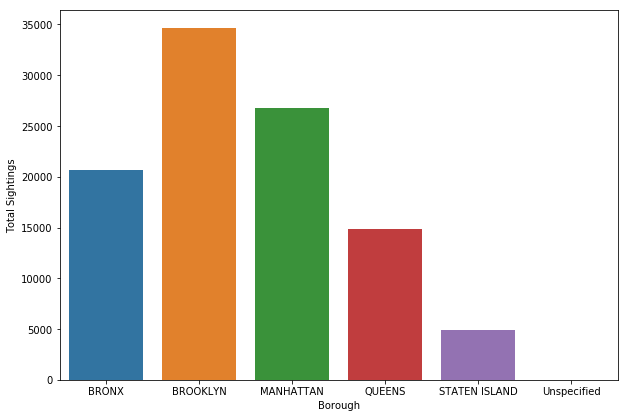

In [31]:
plt.figure(figsize=(10,6.8))
ax = sns.barplot(x="Borough", y="Total Sightings", data=sights_by_borough)

In [47]:
inspections_by_borough = rodent_inspection.groupby("BOROUGH")["JOB_ID"].\
    nunique().\
    reset_index().\
    rename(columns = {"JOB_ID":"Total Sightings","BOROUGH":"Borough"})
inspections_by_borough["Borough"] = inspections_by_borough["Borough"].map(lambda x: x.title())
inspections_by_borough.head()

,Borough,Total Sightings
0,Bronx,362502
1,Brooklyn,274556
2,Manhattan,423075
3,Queens,110586
4,Staten Island,29289


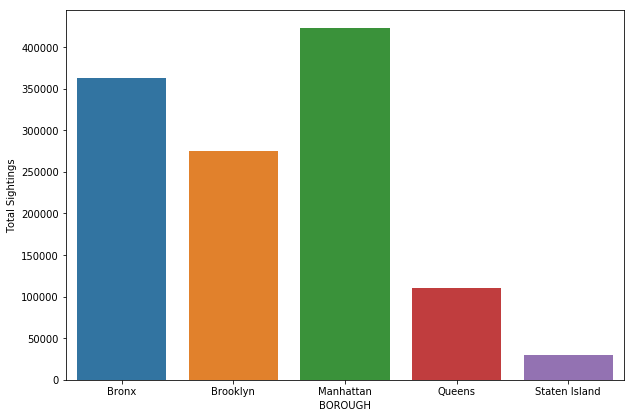

In [42]:
plt.figure(figsize=(10,6.8))
ax = sns.barplot(x="BOROUGH", y="Total Sightings", data=inspections_by_borough)

In [49]:
pd.merge(sights_by_borough,inspections_by_borough,how="left",on = "Borough")

,Borough,Total Sightings_x,Total Sightings_y
0,BRONX,20706,NaN
1,BROOKLYN,34673,NaN
2,MANHATTAN,26803,NaN
3,QUEENS,14811,NaN
4,STATEN ISLAND,4920,NaN
5,Unspecified,1,NaN
